In [2]:
# import neccessary dependencies
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

# Import the data

In [3]:
#training data
train = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\Webdev\hatespeech\train.csv", nrows=5000)

#testing data
test = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\Webdev\hatespeech\test.csv", nrows=5000)


# Clean the data of null values

In [4]:
# view data
train.head(20)

# for chunk in train:
#   display(chunk.head())
#   break

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
5,It doesn't matter whoever won between Duterte ...,0
6,Nognog? Pero nognog din ang nag malasakit? Wtf...,1
7,#OnlyB1nay ?? #FB https://t.co/QEQnsK67Gm,1
8,What Abi Binay said on running for Makati mayo...,0
9,Srsly. How can Binay do away with no tax for t...,1


In [5]:
# drop rows with null values
train.dropna()

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
4995,Awww DUTERTE Na wag Lang si Roxas,0
4996,RT @mikkieugenio: If the SC disqualifies Poe a...,0
4997,"""Pag naging presidente si Binay, wala kayong t...",0
4998,Yan na naman ang walang kwentang commercial ni...,1


In [6]:
#check for null values in train
train.isnull().sum()

text     0
label    0
dtype: int64

In [7]:
# check for 0 values in train
sum(train["label"] == 0)

2653

In [8]:
# check for 1 values in train
sum(train["label"] == 1)

2347

In [9]:
# doucke check for null values
train.head(20)

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
5,It doesn't matter whoever won between Duterte ...,0
6,Nognog? Pero nognog din ang nag malasakit? Wtf...,1
7,#OnlyB1nay ?? #FB https://t.co/QEQnsK67Gm,1
8,What Abi Binay said on running for Makati mayo...,0
9,Srsly. How can Binay do away with no tax for t...,1


In [10]:
# drop null values in test
test.dropna()

,text,label
0,Unshaded votes and votes for Mayor Duterte goe...,1
1,#NoMoreChance https://t.co/msaaUGv0bS,1
2,@itsmanj well there's other good choices like ...,0
3,Nognog. Pandak. Laki sa hirap. Pero corrupt. Y...,1
4,Ex-Binay aide turns tables on Mercado | https:...,0
...,...,...
4227,@Ohohnikk @raachelleele kay nancy binay gagand...,1
4228,RT @chin_tessane: @ImangKuba @Senyora hahahaha...,1
4229,#onlybinay,0
4230,Trend Alert: 'Abby Binay'. More trends at http...,0


In [11]:
test.isnull().sum()

text     0
label    0
dtype: int64

In [12]:
test.head(20)

,text,label
0,Unshaded votes and votes for Mayor Duterte goe...,1
1,#NoMoreChance https://t.co/msaaUGv0bS,1
2,@itsmanj well there's other good choices like ...,0
3,Nognog. Pandak. Laki sa hirap. Pero corrupt. Y...,1
4,Ex-Binay aide turns tables on Mercado | https:...,0
5,2015/10/15 11:37 PHT,0
6,"Binay in Isabela radio interview: ‘Yong iba, ...",0
7,Poor Binay ?? https://t.co/In9yRo5QXI,1
8,RT @sizzlingbubbles: Juskopo! Gugustuhin kong ...,1
9,"ISA LANG MASASABI KO SA AD NI BINAY, P U T A. ...",1


In [13]:
train_shape = train.shape
print(train_shape)

# 10000 train data is available

(5000, 2)


In [14]:
test_shape = test.shape
print(test_shape)

#4232 test data is available

(4232, 2)


# Clean the data of unwated Text and Characters

In [15]:
#remove special characters using the regular expression library

import re

#set up punctuations we want to be replaced

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})(\0-9)")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [16]:
import preprocessor as p

# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [17]:
# clean training data
train_tweet = clean_tweets(train["text"])
train_tweet = pd.DataFrame(train_tweet)

In [18]:
# append cleaned tweets to the training data
train["clean_tweet"] = train_tweet

# compare the cleaned and uncleaned tweets
train.head(50)

,text,label,clean_tweet
0,Inaasahan na ni Vice President Jejomar Binay n...,0,inaasahan na ni vice president jejomar binay n...
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1,mar roxas tang ina tuwid na daan daw eh sya n...
2,Salamat sa walang sawang suporta ng mga taga m...,0,salamat sa walang sawang suporta ng mga taga m...
3,@rapplerdotcom putangina mo binay TAKBO PA,1,putangina mo binay takbo pa
4,"Binay with selective amnesia, forgetting about...",0,binay with selective amnesia forgetting about ...
5,It doesn't matter whoever won between Duterte ...,0,it doesnt matter whoever won between duterte &...
6,Nognog? Pero nognog din ang nag malasakit? Wtf...,1,nognog pero nognog din ang nag malasakit wtf t...
7,#OnlyB1nay ?? #FB https://t.co/QEQnsK67Gm,1,
8,What Abi Binay said on running for Makati mayo...,0,what abi binay said on running for makati mayor
9,Srsly. How can Binay do away with no tax for t...,1,srsly how can binay do away with no tax for th...


In [19]:
sum(train['clean_tweet'] == '')

253

In [20]:
train.head(60)

,text,label,clean_tweet
0,Inaasahan na ni Vice President Jejomar Binay n...,0,inaasahan na ni vice president jejomar binay n...
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1,mar roxas tang ina tuwid na daan daw eh sya n...
2,Salamat sa walang sawang suporta ng mga taga m...,0,salamat sa walang sawang suporta ng mga taga m...
3,@rapplerdotcom putangina mo binay TAKBO PA,1,putangina mo binay takbo pa
4,"Binay with selective amnesia, forgetting about...",0,binay with selective amnesia forgetting about ...
5,It doesn't matter whoever won between Duterte ...,0,it doesnt matter whoever won between duterte &...
6,Nognog? Pero nognog din ang nag malasakit? Wtf...,1,nognog pero nognog din ang nag malasakit wtf t...
7,#OnlyB1nay ?? #FB https://t.co/QEQnsK67Gm,1,
8,What Abi Binay said on running for Makati mayo...,0,what abi binay said on running for makati mayor
9,Srsly. How can Binay do away with no tax for t...,1,srsly how can binay do away with no tax for th...


In [21]:
train.tail(60)

#now problem is since we cleaned the data, there are rows that have empty spaces, we need to remove the rows with empty
#values to avoid problems with training

,text,label,clean_tweet
4940,RT @maria_ressa: Binay: Yolanda rehab a 'manag...,0,binay yolanda rehab a management disaster by via
4941,Si Poe parang isang ubo nalang! Mukha pa syang...,1,si poe parang isang ubo nalang mukha pa syang ...
4942,"RT @cocoy: Hey Grace Poe, look! Chiz meeting w...",1,hey grace poe look chiz meeting w binay he k...
4943,It seems unlucky for P-Noy and Mar Roxas\r\rDA...,1,it seems unlucky for p noy and mar roxasdaang ...
4944,Kunyare gentleman daw si Binay. Hahaha don't u...,1,kunyare gentleman daw si binay hahaha dont us ...
4945,"Mar Roxas: pag may achievements ng iba, credit...",1,mar roxas pag may achievements ng iba credit g...
4946,Retweet sa mga Badtrip kay Mar Roxas ????,1,retweet sa mga badtrip kay mar roxas
4947,Ang sakit sa mata nung mas mataas pa si Roxas ...,1,ang sakit sa mata nung mas mataas pa si roxas ...
4948,"My VLOG. Watch: Binay, opposition lead Typhoon...",0,my vlog watch binay opposition lead typhoon yo...
4949,"What the f**k! Ito ba ang ""daang matuwid""ninyo...",1,what the f**k ito ba ang daang matuwidninyo ni...


In [22]:
#df['Another'] = df['Another'].replace('', np.nan)
#replace all empty spaces with NaN to drop using dropna
train['clean_tweet'] = train['clean_tweet'].replace('', np.NaN)

In [23]:
train.dropna(axis='rows')

,text,label,clean_tweet
0,Inaasahan na ni Vice President Jejomar Binay n...,0,inaasahan na ni vice president jejomar binay n...
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1,mar roxas tang ina tuwid na daan daw eh sya n...
2,Salamat sa walang sawang suporta ng mga taga m...,0,salamat sa walang sawang suporta ng mga taga m...
3,@rapplerdotcom putangina mo binay TAKBO PA,1,putangina mo binay takbo pa
4,"Binay with selective amnesia, forgetting about...",0,binay with selective amnesia forgetting about ...
...,...,...,...
4994,@jefk_rew pity those poor people who were invo...,1,pity those poor people who were involved in th...
4995,Awww DUTERTE Na wag Lang si Roxas,0,awww duterte na wag lang si roxas
4996,RT @mikkieugenio: If the SC disqualifies Poe a...,0,if the sc disqualifies poe as president eithe...
4997,"""Pag naging presidente si Binay, wala kayong t...",0,pag naging presidente si binay wala kayong tax...


In [24]:
train.head(60)

,text,label,clean_tweet
0,Inaasahan na ni Vice President Jejomar Binay n...,0,inaasahan na ni vice president jejomar binay n...
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1,mar roxas tang ina tuwid na daan daw eh sya n...
2,Salamat sa walang sawang suporta ng mga taga m...,0,salamat sa walang sawang suporta ng mga taga m...
3,@rapplerdotcom putangina mo binay TAKBO PA,1,putangina mo binay takbo pa
4,"Binay with selective amnesia, forgetting about...",0,binay with selective amnesia forgetting about ...
5,It doesn't matter whoever won between Duterte ...,0,it doesnt matter whoever won between duterte &...
6,Nognog? Pero nognog din ang nag malasakit? Wtf...,1,nognog pero nognog din ang nag malasakit wtf t...
7,#OnlyB1nay ?? #FB https://t.co/QEQnsK67Gm,1,NaN
8,What Abi Binay said on running for Makati mayo...,0,what abi binay said on running for makati mayor
9,Srsly. How can Binay do away with no tax for t...,1,srsly how can binay do away with no tax for th...


In [25]:
train.tail(60)

,text,label,clean_tweet
4940,RT @maria_ressa: Binay: Yolanda rehab a 'manag...,0,binay yolanda rehab a management disaster by via
4941,Si Poe parang isang ubo nalang! Mukha pa syang...,1,si poe parang isang ubo nalang mukha pa syang ...
4942,"RT @cocoy: Hey Grace Poe, look! Chiz meeting w...",1,hey grace poe look chiz meeting w binay he k...
4943,It seems unlucky for P-Noy and Mar Roxas\r\rDA...,1,it seems unlucky for p noy and mar roxasdaang ...
4944,Kunyare gentleman daw si Binay. Hahaha don't u...,1,kunyare gentleman daw si binay hahaha dont us ...
4945,"Mar Roxas: pag may achievements ng iba, credit...",1,mar roxas pag may achievements ng iba credit g...
4946,Retweet sa mga Badtrip kay Mar Roxas ????,1,retweet sa mga badtrip kay mar roxas
4947,Ang sakit sa mata nung mas mataas pa si Roxas ...,1,ang sakit sa mata nung mas mataas pa si roxas ...
4948,"My VLOG. Watch: Binay, opposition lead Typhoon...",0,my vlog watch binay opposition lead typhoon yo...
4949,"What the f**k! Ito ba ang ""daang matuwid""ninyo...",1,what the f**k ito ba ang daang matuwidninyo ni...


In [26]:
#https://statisticsglobe.com/drop-rows-blank-values-from-pandas-dataframe-python
train['clean_tweet'] = train['clean_tweet'].replace('', float('NaN'), regex = True)

In [27]:
train.dropna(inplace= True)

In [28]:
train.head(60)

,text,label,clean_tweet
0,Inaasahan na ni Vice President Jejomar Binay n...,0,inaasahan na ni vice president jejomar binay n...
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1,mar roxas tang ina tuwid na daan daw eh sya n...
2,Salamat sa walang sawang suporta ng mga taga m...,0,salamat sa walang sawang suporta ng mga taga m...
3,@rapplerdotcom putangina mo binay TAKBO PA,1,putangina mo binay takbo pa
4,"Binay with selective amnesia, forgetting about...",0,binay with selective amnesia forgetting about ...
5,It doesn't matter whoever won between Duterte ...,0,it doesnt matter whoever won between duterte &...
6,Nognog? Pero nognog din ang nag malasakit? Wtf...,1,nognog pero nognog din ang nag malasakit wtf t...
8,What Abi Binay said on running for Makati mayo...,0,what abi binay said on running for makati mayor
9,Srsly. How can Binay do away with no tax for t...,1,srsly how can binay do away with no tax for th...
10,"Sen Grace Poe, puro ka puso. Kaya lugmok bansa...",1,sen grace poe puro ka puso kaya lugmok bansa n...


In [29]:
train.tail(60)

,text,label,clean_tweet
4934,Kainis mukha ni Binay. Luuh! Sge maglibot ka b...,1,kainis mukha ni binay luuh sge maglibot ka buo...
4936,Nakakapagtaka. Binay and Mar are both part of ...,0,nakakapagtaka binay and mar are both part of t...
4938,Binay is Not Deserving??????,1,binay is not deserving
4939,Wag mong isisi sa araw binay. Wag,1,wag mong isisi sa araw binay wag
4940,RT @maria_ressa: Binay: Yolanda rehab a 'manag...,0,binay yolanda rehab a management disaster by via
4941,Si Poe parang isang ubo nalang! Mukha pa syang...,1,si poe parang isang ubo nalang mukha pa syang ...
4942,"RT @cocoy: Hey Grace Poe, look! Chiz meeting w...",1,hey grace poe look chiz meeting w binay he k...
4943,It seems unlucky for P-Noy and Mar Roxas\r\rDA...,1,it seems unlucky for p noy and mar roxasdaang ...
4944,Kunyare gentleman daw si Binay. Hahaha don't u...,1,kunyare gentleman daw si binay hahaha dont us ...
4945,"Mar Roxas: pag may achievements ng iba, credit...",1,mar roxas pag may achievements ng iba credit g...


In [30]:
first_column = train.pop('label')
train.insert(0,'label',first_column)

In [31]:
train.head(10)

,label,text,clean_tweet
0,0,Inaasahan na ni Vice President Jejomar Binay n...,inaasahan na ni vice president jejomar binay n...
1,1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,mar roxas tang ina tuwid na daan daw eh sya n...
2,0,Salamat sa walang sawang suporta ng mga taga m...,salamat sa walang sawang suporta ng mga taga m...
3,1,@rapplerdotcom putangina mo binay TAKBO PA,putangina mo binay takbo pa
4,0,"Binay with selective amnesia, forgetting about...",binay with selective amnesia forgetting about ...
5,0,It doesn't matter whoever won between Duterte ...,it doesnt matter whoever won between duterte &...
6,1,Nognog? Pero nognog din ang nag malasakit? Wtf...,nognog pero nognog din ang nag malasakit wtf t...
8,0,What Abi Binay said on running for Makati mayo...,what abi binay said on running for makati mayor
9,1,Srsly. How can Binay do away with no tax for t...,srsly how can binay do away with no tax for th...
10,1,"Sen Grace Poe, puro ka puso. Kaya lugmok bansa...",sen grace poe puro ka puso kaya lugmok bansa n...


In [32]:
#total data entries for training

print(train.shape)

(4747, 3)


In [33]:
# remove unwanted text from test data
test.head(60)

,text,label
0,Unshaded votes and votes for Mayor Duterte goe...,1
1,#NoMoreChance https://t.co/msaaUGv0bS,1
2,@itsmanj well there's other good choices like ...,0
3,Nognog. Pandak. Laki sa hirap. Pero corrupt. Y...,1
4,Ex-Binay aide turns tables on Mercado | https:...,0
5,2015/10/15 11:37 PHT,0
6,"Binay in Isabela radio interview: ‘Yong iba, ...",0
7,Poor Binay ?? https://t.co/In9yRo5QXI,1
8,RT @sizzlingbubbles: Juskopo! Gugustuhin kong ...,1
9,"ISA LANG MASASABI KO SA AD NI BINAY, P U T A. ...",1


In [34]:
first_column = test.pop('label')
test.insert(0,'label',first_column)

In [35]:
test.head(10)

,label,text
0,1,Unshaded votes and votes for Mayor Duterte goe...
1,1,#NoMoreChance https://t.co/msaaUGv0bS
2,0,@itsmanj well there's other good choices like ...
3,1,Nognog. Pandak. Laki sa hirap. Pero corrupt. Y...
4,0,Ex-Binay aide turns tables on Mercado | https:...
5,0,2015/10/15 11:37 PHT
6,0,"Binay in Isabela radio interview: ‘Yong iba, ..."
7,1,Poor Binay ?? https://t.co/In9yRo5QXI
8,1,RT @sizzlingbubbles: Juskopo! Gugustuhin kong ...
9,1,"ISA LANG MASASABI KO SA AD NI BINAY, P U T A. ..."


In [36]:
test_tweet = clean_tweets(test["text"])
test_tweet = pd.DataFrame(test_tweet)

In [37]:
# append cleaned tweets to the training data
test["clean_tweet"] = test_tweet

# compare the cleaned and uncleaned tweets
test.head(50)

,label,text,clean_tweet
0,1,Unshaded votes and votes for Mayor Duterte goe...,unshaded votes and votes for mayor duterte goe...
1,1,#NoMoreChance https://t.co/msaaUGv0bS,
2,0,@itsmanj well there's other good choices like ...,well theres other good choices like duterte or...
3,1,Nognog. Pandak. Laki sa hirap. Pero corrupt. Y...,nognog pandak laki sa hirap pero corrupt yan s...
4,0,Ex-Binay aide turns tables on Mercado | https:...,ex binay aide turns tables on mercado
5,0,2015/10/15 11:37 PHT,10 15 37 pht
6,0,"Binay in Isabela radio interview: ‘Yong iba, ...",binay in isabela radio interview yong iba nang...
7,1,Poor Binay ?? https://t.co/In9yRo5QXI,poor binay
8,1,RT @sizzlingbubbles: Juskopo! Gugustuhin kong ...,juskopo gugustuhin kong ma clark ma leah pwed...
9,1,"ISA LANG MASASABI KO SA AD NI BINAY, P U T A. ...",isa lang masasabi ko sa ad ni binay p u t a bo...


In [38]:
#https://statisticsglobe.com/drop-rows-blank-values-from-pandas-dataframe-python
test['clean_tweet'] = test['clean_tweet'].replace('', float('NaN'), regex = True)
test.dropna(inplace= True)


In [39]:
test.head(60)

,label,text,clean_tweet
0,1,Unshaded votes and votes for Mayor Duterte goe...,unshaded votes and votes for mayor duterte goe...
2,0,@itsmanj well there's other good choices like ...,well theres other good choices like duterte or...
3,1,Nognog. Pandak. Laki sa hirap. Pero corrupt. Y...,nognog pandak laki sa hirap pero corrupt yan s...
4,0,Ex-Binay aide turns tables on Mercado | https:...,ex binay aide turns tables on mercado
5,0,2015/10/15 11:37 PHT,10 15 37 pht
6,0,"Binay in Isabela radio interview: ‘Yong iba, ...",binay in isabela radio interview yong iba nang...
7,1,Poor Binay ?? https://t.co/In9yRo5QXI,poor binay
8,1,RT @sizzlingbubbles: Juskopo! Gugustuhin kong ...,juskopo gugustuhin kong ma clark ma leah pwed...
9,1,"ISA LANG MASASABI KO SA AD NI BINAY, P U T A. ...",isa lang masasabi ko sa ad ni binay p u t a bo...
10,0,#OnlyBinayWinner Only B1NAY,only b1nay


In [40]:
#remove stopwords
import urllib.request, json 
with urllib.request.urlopen("https://raw.githubusercontent.com/stopwords-iso/stopwords-tl/master/stopwords-tl.json") as url:
    stopwords = json.loads(url.read().decode())
    print(stopwords)

['akin', 'aking', 'ako', 'alin', 'am', 'amin', 'aming', 'ang', 'ano', 'anumang', 'apat', 'at', 'atin', 'ating', 'ay', 'bababa', 'bago', 'bakit', 'bawat', 'bilang', 'dahil', 'dalawa', 'dapat', 'din', 'dito', 'doon', 'gagawin', 'gayunman', 'ginagawa', 'ginawa', 'ginawang', 'gumawa', 'gusto', 'habang', 'hanggang', 'hindi', 'huwag', 'iba', 'ibaba', 'ibabaw', 'ibig', 'ikaw', 'ilagay', 'ilalim', 'ilan', 'inyong', 'isa', 'isang', 'itaas', 'ito', 'iyo', 'iyon', 'iyong', 'ka', 'kahit', 'kailangan', 'kailanman', 'kami', 'kanila', 'kanilang', 'kanino', 'kanya', 'kanyang', 'kapag', 'kapwa', 'karamihan', 'katiyakan', 'katulad', 'kaya', 'kaysa', 'ko', 'kong', 'kulang', 'kumuha', 'kung', 'laban', 'lahat', 'lamang', 'likod', 'lima', 'maaari', 'maaaring', 'maging', 'mahusay', 'makita', 'marami', 'marapat', 'masyado', 'may', 'mayroon', 'mga', 'minsan', 'mismo', 'mula', 'muli', 'na', 'nabanggit', 'naging', 'nagkaroon', 'nais', 'nakita', 'namin', 'napaka', 'narito', 'nasaan', 'ng', 'ngayon', 'ni', 'nila',

In [41]:
#data['content2'] =data['Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
train['rm_stpwrds'] = train['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords) ]))

In [42]:
train[['clean_tweet', 'rm_stpwrds']].head(50)

,clean_tweet,rm_stpwrds
0,inaasahan na ni vice president jejomar binay n...,inaasahan vice president jejomar binay taong
1,mar roxas tang ina tuwid na daan daw eh sya n...,mar roxas tang ina tuwid daan daw eh sya nga d...
2,salamat sa walang sawang suporta ng mga taga m...,salamat sawang suporta taga makati pagbabalik ...
3,putangina mo binay takbo pa,putangina mo binay takbo
4,binay with selective amnesia forgetting about ...,binay with selective amnesia forgetting about ...
5,it doesnt matter whoever won between duterte &...,it doesnt matter whoever won between duterte &...
6,nognog pero nognog din ang nag malasakit wtf t...,nognog nognog nag malasakit wtf tangina mo bin...
8,what abi binay said on running for makati mayor,what abi binay said on running for makati mayor
9,srsly how can binay do away with no tax for th...,srsly how can binay do away with no tax for th...
10,sen grace poe puro ka puso kaya lugmok bansa n...,sen grace poe puro puso lugmok bansa natin kah...


In [43]:
#tokenization 

import nltk
from nltk.tokenize import WhitespaceTokenizer
train['tokenize'] = train['rm_stpwrds'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize) 
train['tokenize'].head()



0    [inaasahan, vice, president, jejomar, binay, t...
1    [mar, roxas, tang, ina, tuwid, daan, daw, eh, ...
2    [salamat, sawang, suporta, taga, makati, pagba...
3                        [putangina, mo, binay, takbo]
4    [binay, with, selective, amnesia, forgetting, ...
Name: tokenize, dtype: object

In [44]:
train[['rm_stpwrds','tokenize']].head(30)

,rm_stpwrds,tokenize
0,inaasahan vice president jejomar binay taong,"[inaasahan, vice, president, jejomar, binay, t..."
1,mar roxas tang ina tuwid daan daw eh sya nga d...,"[mar, roxas, tang, ina, tuwid, daan, daw, eh, ..."
2,salamat sawang suporta taga makati pagbabalik ...,"[salamat, sawang, suporta, taga, makati, pagba..."
3,putangina mo binay takbo,"[putangina, mo, binay, takbo]"
4,binay with selective amnesia forgetting about ...,"[binay, with, selective, amnesia, forgetting, ..."
5,it doesnt matter whoever won between duterte &...,"[it, doesnt, matter, whoever, won, between, du..."
6,nognog nognog nag malasakit wtf tangina mo bin...,"[nognog, nognog, nag, malasakit, wtf, tangina,..."
8,what abi binay said on running for makati mayor,"[what, abi, binay, said, on, running, for, mak..."
9,srsly how can binay do away with no tax for th...,"[srsly, how, can, binay, do, away, with, no, t..."
10,sen grace poe puro puso lugmok bansa natin kah...,"[sen, grace, poe, puro, puso, lugmok, bansa, n..."


In [45]:
# POS tags 
# english_tags = ['NN', 'NNS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
# tagalog_tags = ['NN', 'NNS', 'VB', 'VBP', 'JJ', 'RB']

# detect the language 
# for i, tokens in enumerate(train['tokenize']):
#     if i >= 50:
#         break
#     tags = nltk.pos_tag(tokens)
#     english_count = sum(1 for tag in tags if tag[1] in english_tags)
#     tagalog_count = sum(1 for tag in tags if tag[1] in tagalog_tags)
#     if english_count > tagalog_count:
#         print("English:", ' '.join(tokens))
#     elif english_count < tagalog_count:
#         print("Tagalog:", ' '.join(tokens))
#     else:
#         print("Taglish:", ' '.join(tokens))

#comment ko muna di ko kasi mahanap dependencies hehe

# may mga changes pa ako di lang yan haha di ko lang muna nilagay uwu -jords

# Proceeding to Training

In [46]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train['tokenize'], train['label'], test_size=0.3, random_state=1)


In [47]:
# Vectorize the sentences using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(map(' '.join, X_train))
X_test = vectorizer.transform(map(' '.join, X_test))

In [48]:
# Train the SVM model
clf = svm.SVC()
clf.fit(X_train, y_train)

# Test the model on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7249122807017544


Confusion Matrix:
[[594 173]
 [219 439]]


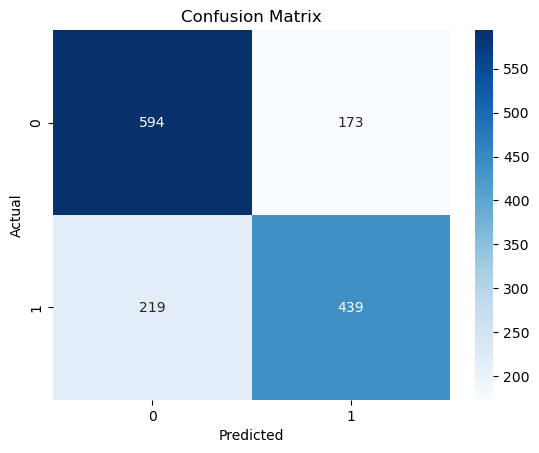

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       767
           1       0.72      0.67      0.69       658

    accuracy                           0.72      1425
   macro avg       0.72      0.72      0.72      1425
weighted avg       0.72      0.72      0.72      1425



In [50]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

In [52]:
# Convert the sparse matrices to strings
X_train = ["".join(row.nonzero()[1].astype(str)) for row in X_train]
X_test = ["".join(row.nonzero()[1].astype(str)) for row in X_test]

# Vectorize the sentences using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the SVM model
clf = svm.SVC()
clf.fit(X_train, y_train)

# Test the model on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.543859649122807
